In [1]:
import math

nums = [1, 2, 5, 1, 3, 100, 3, 5, 40, 45, 279, 130, 71]

# Solusi No 1

In [2]:
nums.sort()

In [3]:
def first_quartile(n):
    # Nomor 1a
    return n[math.floor(0.25 * len(n))]

def median(n):
    # Nomor 1b
    return n[math.floor(0.5 * len(n))]

def third_quartile(n):
    # Nomor 1c
    return n[math.floor(0.75 * len(n))]

def iqr(n):
    # Nomor 1d
    return third_quartile(n) - first_quartile(n)

In [9]:
print(first_quartile(nums))
print(median(nums))
print(third_quartile(nums))
print(iqr(nums))

# Nomor 1e
batas_bawah = first_quartile(nums) - (1.5 * iqr(nums))
batas_atas = third_quartile(nums) + (1.5 * iqr(nums))

for n in nums:
    if((n < batas_bawah) | (n > batas_atas)):
        print(n)

3
5
71
68
279


In [42]:
# import numpy as np

# print(np.quantile(nums, 0.25))
# print(np.quantile(nums, 0.5))
# print(np.quantile(nums, 0.75))

3.0
5.0
71.0


# Solusi No 2

Sumber data: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign?resource=download (dengan modifikasi)

ID - Customer number
Year_birth - customer year birth
AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
Complain - 1 if customer complained in the last 2 years
DtCustomer - date of customer’s enrolment with the company
Education - customer’s level of education
Marital - customer’s marital status
Kidhome - number of small children in customer’s household
Teenhome - number of teenagers in customer’s household
Income - customer’s yearly household income
MntMeatProducts - amount spent on meat products in the last 2 years
MntFruits - amount spent on fruits products in the last 2 years
NumStorePurchases - number of purchases made directly in stores
NumWebPurchases - number of purchases made through company’s web site
NumWebVisitsMonth - number of visits to company’s web site in the last month
Recency - number of days since the last purchase

In [92]:
import pandas as pd
import numpy as np

df = pd.read_excel('C:\\Users\\u071775\\OneDrive - BCA\\Documents\\Assignment 06 - Data Mining\\marketing_campaign.xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntFruits,MntMeatProducts,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,88,546,8,4,7,0,0,0,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,1,6,1,2,5,0,0,0,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,49,127,8,10,4,0,0,0,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,4,20,2,4,6,0,0,0,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,43,118,5,6,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,2013-06-13,46,43,182,9,4,5,0,0,0,0
2236,4001,1946,PhD,Together,64014,2,1,2014-06-10,56,0,30,8,5,7,0,0,0,0
2237,7270,1981,Graduation,Divorced,56981,0,0,2014-01-25,91,48,217,2,13,6,0,1,0,0
2238,8235,1956,Master,Together,69245,0,1,2014-01-24,8,30,214,6,10,3,0,0,0,0


In [96]:
from sklearn.decomposition import PCA

df_for_outlier = df[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntFruits', 'MntMeatProducts', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']]

pca = PCA(n_components=2)

principal_comp = pca.fit_transform(df_for_outlier)

pca_df = pd.DataFrame(data = principal_comp, columns = ['principal_component_1', 'principal_component_2'])
pca_df

,principal_component_1,principal_component_2
0,6116.083502,-351.521114
1,-5680.557121,133.596847
2,19588.758170,138.098616
3,-25378.228734,18.768296
4,6268.880758,79.183590
...,...,...
2235,9199.167968,30.643170
2236,11989.333746,199.886912
2237,4957.403209,-26.596531
2238,17221.217808,40.939819


In [97]:
from sklearn.neighbors import LocalOutlierFactor


clf = LocalOutlierFactor(n_neighbors=1500)
X = pca_df.values
y_pred = clf.fit_predict(X)
pca_df.index[y_pred==-1]

df_outlier_lof = df.iloc[pca_df.index[y_pred==-1]]
df_outlier_lof

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntFruits,MntMeatProducts,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Complain,Response
124,7215,1983,Graduation,Single,101970,0,0,2013-03-12,69,27,102,6,13,2,0,1,0,1
133,1295,1963,Graduation,Married,122000,0,1,2013-08-11,96,65,196,6,7,4,0,0,0,0
164,8475,1973,PhD,Married,157243,0,1,2014-03-01,98,2,1582,0,0,0,0,0,0,0
203,2798,1977,PhD,Together,102160,0,0,2012-11-02,54,29,138,7,10,4,0,1,0,1
252,10089,1974,Graduation,Divorced,102692,0,0,2013-04-05,5,148,444,6,13,2,0,1,0,1
312,2437,1989,Graduation,Married,128122,0,0,2013-06-03,69,138,461,6,12,3,0,1,0,0
617,1503,1976,PhD,Together,162397,1,1,2013-06-03,31,1,16,0,1,1,0,0,0,0
646,4611,1970,Graduation,Together,105471,0,0,2013-01-21,36,181,104,9,13,3,0,0,0,1
655,5555,1975,Graduation,Divorced,153924,0,0,2014-02-07,81,1,1,0,0,0,0,0,0,0
687,1501,1982,PhD,Married,160803,0,0,2012-08-04,21,16,1622,0,1,0,0,0,0,0


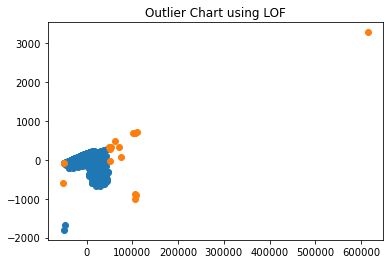

In [98]:
#Plot demografi yang outlier
import matplotlib.pyplot as plt

normal_data = pca_df.iloc[np.where(y_pred != -1)]
outliers = pca_df.iloc[np.where(y_pred == -1)]

plt.scatter(normal_data.iloc[:, 0], normal_data.iloc[:, 1])
plt.scatter(outliers.iloc[:, 0], outliers.iloc[:, 1])
plt.title("Outlier Chart using LOF")
plt.show()

# Solusi No 3

In [99]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 1500, min_samples = 10)
X = pca_df.values
y_pred = dbscan.fit_predict(X)

pca_df.index[y_pred==-1]

df_outlier_dbscan = df.iloc[pca_df.index[y_pred==-1]]
df_outlier_dbscan

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntFruits,MntMeatProducts,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Complain,Response
21,5376,1979,Graduation,Married,2447,1,0,2013-01-06,42,1,1725,0,0,1,0,0,0,0
27,5255,1986,Graduation,Single,3654,1,0,2013-02-20,19,1,3,27,0,1,0,0,0,0
124,7215,1983,Graduation,Single,101970,0,0,2013-03-12,69,27,102,6,13,2,0,1,0,1
133,1295,1963,Graduation,Married,122000,0,1,2013-08-11,96,65,196,6,7,4,0,0,0,0
164,8475,1973,PhD,Married,157243,0,1,2014-03-01,98,2,1582,0,0,0,0,0,0,0
203,2798,1977,PhD,Together,102160,0,0,2012-11-02,54,29,138,7,10,4,0,1,0,1
252,10089,1974,Graduation,Divorced,102692,0,0,2013-04-05,5,148,444,6,13,2,0,1,0,1
312,2437,1989,Graduation,Married,128122,0,0,2013-06-03,69,138,461,6,12,3,0,1,0,0
617,1503,1976,PhD,Together,162397,1,1,2013-06-03,31,1,16,0,1,1,0,0,0,0
646,4611,1970,Graduation,Together,105471,0,0,2013-01-21,36,181,104,9,13,3,0,0,0,1


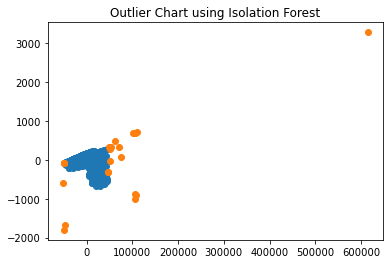

In [100]:
#Plot demografi yang outlier
import matplotlib.pyplot as plt

normal_data = pca_df.iloc[np.where(y_pred != -1)]
outliers = pca_df.iloc[np.where(y_pred == -1)]

plt.scatter(normal_data.iloc[:, 0], normal_data.iloc[:, 1])
plt.scatter(outliers.iloc[:, 0], outliers.iloc[:, 1])
plt.title("Outlier Chart using Isolation Forest")
plt.show()

# Solusi No 4

In [107]:
from sklearn.ensemble import IsolationForest

X = pca_df.values

clf = IsolationForest(n_estimators = 100, contamination = 0.0025, max_samples ='auto')
y_pred = clf.fit_predict(X)

df_outlier_iso = df.iloc[pca_df.index[y_pred==-1]]
df_outlier_iso

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntFruits,MntMeatProducts,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Complain,Response
617,1503,1976,PhD,Together,162397,1,1,2013-06-03,31,1,16,0,1,1,0,0,0,0
655,5555,1975,Graduation,Divorced,153924,0,0,2014-02-07,81,1,1,0,0,0,0,0,0,0
1300,5336,1971,Master,Together,157733,1,0,2013-06-04,37,1,9,1,1,1,0,0,0,0
1653,4931,1977,Graduation,Together,157146,0,0,2013-04-29,13,0,1725,0,0,1,0,0,0,0
2132,11181,1949,PhD,Married,156924,0,0,2013-08-29,85,1,2,0,0,0,0,0,0,0
2233,9432,1977,Graduation,Together,666666,1,0,2013-06-02,23,14,18,3,3,6,0,0,0,0


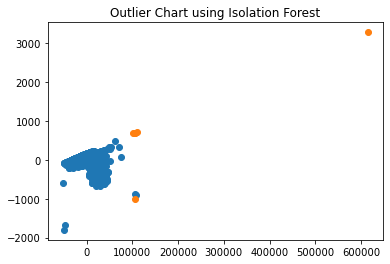

In [108]:
import matplotlib.pyplot as plt

normal_data = pca_df.iloc[np.where(y_pred != -1)]
outliers = pca_df.iloc[np.where(y_pred == -1)]

plt.scatter(normal_data.iloc[:, 0], normal_data.iloc[:, 1])
plt.scatter(outliers.iloc[:, 0], outliers.iloc[:, 1])
plt.title("Outlier Chart using Isolation Forest")
plt.show()

# Solusi No 5

In [115]:
idx = df_outlier_lof.index.intersection(df_outlier_dbscan.index)
idx = df_outlier_iso.index.intersection(idx)
idx

Int64Index([617, 655, 1300, 1653, 2132, 2233], dtype='int64')

In [117]:
df.iloc[idx]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntFruits,MntMeatProducts,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Complain,Response
617,1503,1976,PhD,Together,162397,1,1,2013-06-03,31,1,16,0,1,1,0,0,0,0
655,5555,1975,Graduation,Divorced,153924,0,0,2014-02-07,81,1,1,0,0,0,0,0,0,0
1300,5336,1971,Master,Together,157733,1,0,2013-06-04,37,1,9,1,1,1,0,0,0,0
1653,4931,1977,Graduation,Together,157146,0,0,2013-04-29,13,0,1725,0,0,1,0,0,0,0
2132,11181,1949,PhD,Married,156924,0,0,2013-08-29,85,1,2,0,0,0,0,0,0,0
2233,9432,1977,Graduation,Together,666666,1,0,2013-06-02,23,14,18,3,3,6,0,0,0,0
